# 2018312990 조명재 5/2 출석대체과제

In [45]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')

In [46]:
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [47]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [48]:
import numpy as np
def count_missing(vec) :
    null_vec = pd.isnull(vec)
    null_count = np.sum(null_vec)
    return null_count

In [49]:
missing = titanic.apply(count_missing)
print(missing)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [50]:
missing_row = titanic.apply(count_missing, axis = 1)
print(missing_row)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


In [51]:
titanic.groupby('survived').size()

survived
0    549
1    342
dtype: int64

In [52]:
titanic.groupby('pclass').size()

pclass
1    216
2    184
3    491
dtype: int64

In [53]:
titanic.groupby('sex').size()

sex
female    314
male      577
dtype: int64

In [54]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [55]:
mean = titanic['age'].mean(skipna=True)
mean = round(mean, 1)
print(mean)

29.7


In [56]:
mean = titanic['fare'].mean()
mean = round(mean, 1)
print(mean)

32.2


# 교차분석 - Crosstable, chi-square, p-value

In [57]:
import scipy.stats as stats

In [58]:
pd.crosstab(titanic['class'], titanic['alive'], margins = True)

alive,no,yes,All
class,,,
First,80,136,216
Second,97,87,184
Third,372,119,491
All,549,342,891


In [59]:
pd.crosstab(titanic['class'], titanic['alive'],
            margins = True, normalize = True)

alive,no,yes,All
class,,,
First,0.089787,0.152637,0.242424
Second,0.108866,0.097643,0.206510
Third,0.417508,0.133558,0.551066
All,0.616162,0.383838,1.000000


In [60]:
pd.crosstab(titanic['sex'],titanic['alive'], margins = True)

alive,no,yes,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [61]:
#sex와 class를 묶은 뒤 alive에 대해 교차분석
pd.crosstab([titanic['class'], titanic['sex']], titanic['alive'],
           margins = True)

alive           no  yes  All
class  sex                  
First  female    3   91   94
       male     77   45  122
Second female    6   70   76
       male     91   17  108
Third  female   72   72  144
       male    300   47  347
All            549  342  891

In [62]:
chi2= pd.crosstab(titanic['sex'], titanic['alive'])
stats.chi2_contingency(chi2)
#chi square : 260
#p = 0.00 < 0.05, 두 변수의 분포는 독립적이지 않다
#자유도 = 1
#array = 기댓값

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

In [63]:
chi2 = pd.crosstab(titanic['class'], titanic['alive'])
stats.chi2_contingency(chi2)
#chi square : 102
#p = 0.00 < 0.05, 두 변수의 분포는 독립적이지 않다
#자유도 = 2
#array = 기댓값

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

In [64]:
chi2= pd.crosstab(titanic['class'], titanic['alive'])
stats.chi2_contingency(chi2)
#chi square : 102
#p = 0.00 < 0.05, 두 변수의 분포는 독립적이지 않다
#자유도 = 2
#array = 기댓값

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

In [65]:
print(titanic.groupby('class')['fare'].mean()) 
#집단별 비교 (범주평변수/숫자형변수 계산)

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64


In [66]:
print(titanic.groupby('sex')['age'].mean()) 
#성별 비교

sex
female    27.915709
male      30.726645
Name: age, dtype: float64


/Users/j-max/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Freq')

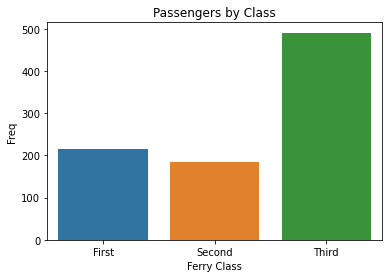

In [67]:
import matplotlib.pyplot as plt

ax= plt.subplots()  
ax= sns.countplot('class', data= titanic)  
ax.set_title('Passengers by Class')         
ax.set_xlabel('Ferry Class')      
ax.set_ylabel('Freq')   


Text(0.5, 0, 'survive')

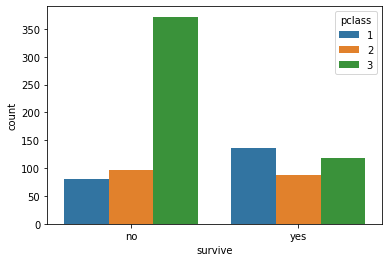

In [68]:
ax = plt.subplots()
ax = sns.countplot(x = 'alive', hue = 'pclass', hue_order = [1,2,3],
                  data = titanic)
ax.set_xlabel("survive")

Text(0.5, 0, 'ferry class')

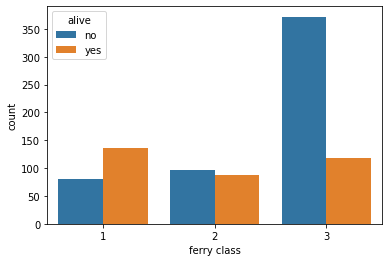

In [69]:
ax = plt.subplots()
ax = sns.countplot(x= 'pclass', hue = 'alive', data = titanic)
ax.set_xlabel('ferry class')


Text(0.5, 0, 'sex of passengers')

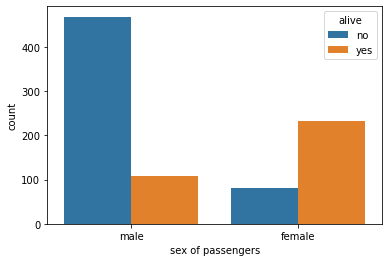

In [70]:
ax = plt.subplots()
ax = sns.countplot(x= 'sex', hue= 'alive', data = titanic)
ax.set_xlabel('sex of passengers')


In [71]:
plt.savefig('graph_bar.jpg')


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Age of passengers')

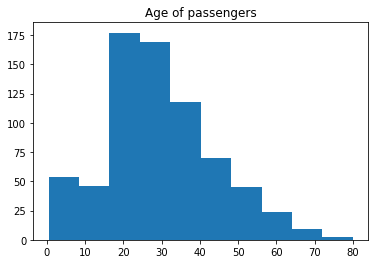

In [72]:
fig = plt.figure()
axesl = fig.add_subplot(1,1,1)
axesl.hist(titanic['age'], bins = 10)
axesl.set_title('Age of passengers')


(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

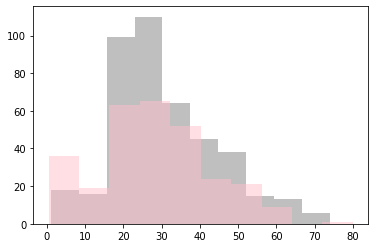

In [73]:
fig = plt.figure()
axesl = fig.add_subplot(1,1,1)
data_1 = titanic[titanic['survived']==0]['age'].tolist()
data_2 = titanic[titanic['survived']==1]['age'].tolist()
plt.hist(data_1, bins=10, color= 'grey', alpha = 0.5)
plt.hist(data_2, bins=10, color= 'pink', alpha = 0.5)


(array([233.,  70.,  23.,   2.,   7.,   4.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

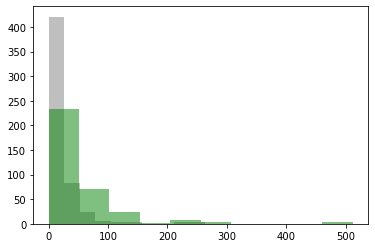

In [74]:
fig = plt.figure()  
axes1= fig.add_subplot(1,1,1)    

data_1= titanic[titanic['survived']==0]['fare'].tolist()
data_2= titanic[titanic['survived']==1]['fare'].tolist()
plt.hist(data_1, bins=10, color= 'grey', alpha= 0.5)     
plt.hist(data_2, bins=10, color= 'green', alpha= 0.5)   


Text(0, 0.5, 'fare')

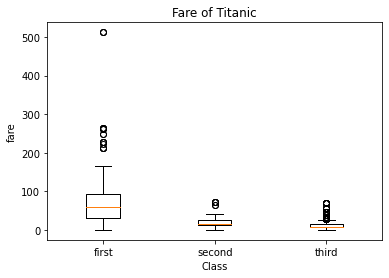

In [75]:
boxplot= plt.figure()
axes1= boxplot.add_subplot(1,1,1)  
axes1.boxplot([titanic[titanic['class']== 'First']['fare'],
               titanic[titanic['class']== 'Second']['fare'],
               titanic[titanic['class']== 'Third']['fare']],
               labels= ['first', 'second', 'third'])
axes1.set_title('Fare of Titanic')        
axes1.set_xlabel('Class')                  
axes1.set_ylabel('fare')  


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4e03d3250>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4e03d3970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4e03c5d60>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff4e03dd100>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4e03dd490>,
 'means': []}

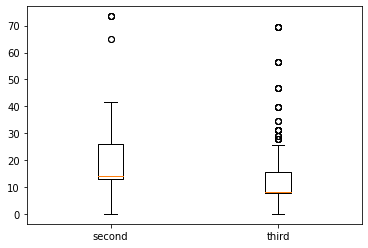

In [76]:
boxplot= plt.figure()
axes1= boxplot.add_subplot(1,1,1)  
axes1.boxplot([titanic[titanic['class']== 'Second']['fare'],
               titanic[titanic['class']== 'Third']['fare']],
               labels= ['second', 'third'])


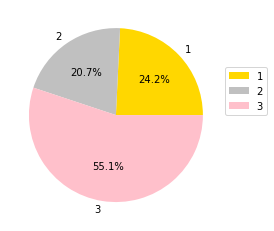

In [77]:
col = pd.Series(['gold', 'silver', 'pink'])    
pclass= titanic.groupby('pclass').size()      
#빈도표 제작 후 piegraph에 사용

f, ax = plt.subplots(1,1)
plt.pie(pclass, autopct='%.1f%%', labels=[1,2,3], colors= col)    # autopct='%.1f%%' 파이에 퍼센트표시
plt.legend(loc = (1, 0.5))

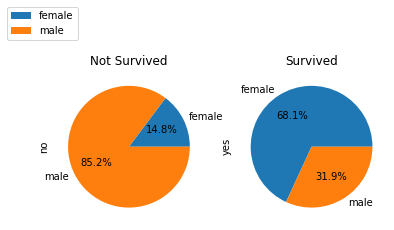

In [78]:
a= pd.crosstab(titanic['sex'], titanic['alive'])

fig, ax = plt.subplots(1,2)        
a['no'].plot.pie(autopct='%.1f%%', ax=ax[0])    # 사망자 
a['yes'].plot.pie(autopct='%.1f%%', ax=ax[1])   # 생존자 
ax[0].set_title('Not Survived')   
ax[1].set_title('Survived')       
plt.legend(loc = (-1.5, 1.2))     


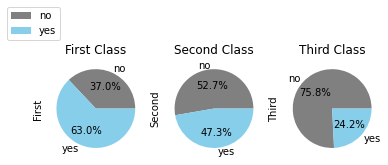

In [79]:
col= pd.Series(['grey', 'skyblue'])
b= pd.crosstab(titanic['alive'], titanic['class'])

fig, ax = plt.subplots(1,3)           
b['First'].plot.pie(autopct='%.1f%%', ax=ax[0], colors= col)
b['Second'].plot.pie(autopct='%.1f%%', ax=ax[1], colors= col)
b['Third'].plot.pie(autopct='%.1f%%', ax=ax[2], colors= col)
ax[0].set_title('First Class')      
ax[1].set_title('Second Class')     
ax[2].set_title('Third Class')       
plt.legend(loc = (-2.8, 1.2))


In [80]:
fig.savefig('graph_pie3.jpg')
